# A7: Data analysis in Python

In [36]:
# Run once then delete this cell
!pip install statsmodels

     |████████████████████████████████| 9.6 MB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 2.2 MB/s eta 0:00:01


In [21]:
import numpy as np
import pandas as pd
import plotly.express as px
from io import StringIO

## Data representations

### Pandas DataFrames

Consider an Excel or csv file with columns of data containing volumes and pressures:

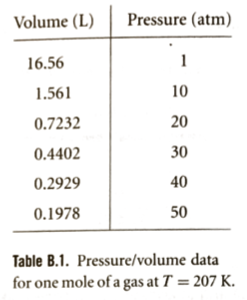

We can bring this data into Python by making a pandas DataFrame; in general, the easiest way to do this is to import the `.csv` or `.xlsx` file. In this case, we'll just put the `.csv` data into a string in Python

In [28]:
PV_csv=StringIO("""
V (L),P (atm)
16.56,1
1.561,10
0.7232,20
0.4402,30
0.2929,40
0.1978,50
""")

Then we can use `pd.read_csv(PV_csv)` to load the data. Do that below:

In [29]:
df = pd.read_csv(PV_csv)
df

,V (L),P (atm)
0,16.5600,1
1,1.5610,10
2,0.7232,20
3,0.4402,30
4,0.2929,40
5,0.1978,50


Your result should look like this:

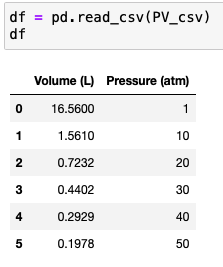

We can count the number of data points using Python's `len` function:

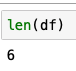

Make a scatter plot with plotly using `px.scatter(df, x='V (L)', y='P (atm)')`

In [30]:
px.scatter(df, x='V (L)', y='P (atm)')

Let's make this easier to compare to the ideal gas law by plotting something that should be a straight line: We'll plot $P$ vs $1/V$ instead by defining a column for $1/V$ - we can do that using the bracket syntax - you can tab-complete to autocomplete the column name: `'V (L)'`

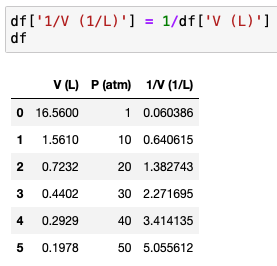

In [32]:
df['1/V (1/L)'] = 1/df['V (L)']
df

,V (L),P (atm),1/V (1/L)
0,16.5600,1,0.060386
1,1.5610,10,0.640615
2,0.7232,20,1.382743
3,0.4402,30,2.271695
4,0.2929,40,3.414135
5,0.1978,50,5.055612


Now we can update our plot and add a trendline:

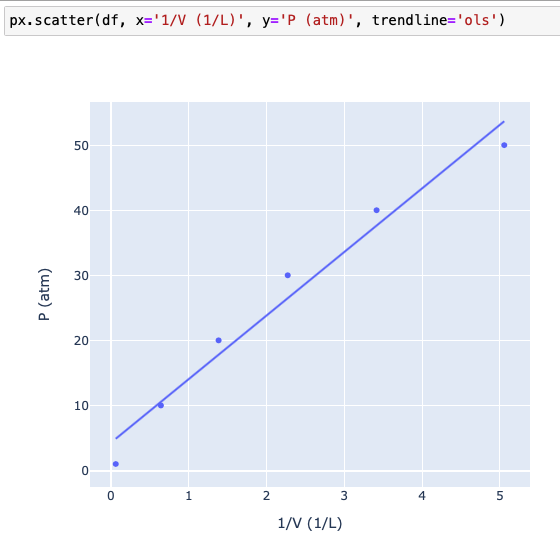

You can scan over your plot to get the trendline 

In [44]:
px.scatter(df, x='1/V (1/L)', y='P (atm)', trendline='ols')

### Importing from data files

Download a CSV file containing the temperature-dependent heat capacity of ammonia gas from http://hdl.handle.net/10066/17736 and save the Ammonia HeatCapacity.csv file to your Downloads folder. Load the file into Python using

```
df2 = pd.read_csv("~/Downloads/AmmoniaHeatCapacity.csv")
df2
```

In [49]:
df2 = pd.read_csv("~/Downloads/AmmoniaHeatCapacity.csv")
df2

,T/K,Cp/J/K/mol
0,300,35.56
1,400,38.82
2,500,41.68
3,600,44.38
4,700,47.00
5,800,49.59
6,900,52.15
7,1000,54.70


**Try it:** Use the same procedure from above to plot the data and add a trendline:

In [85]:
fig = px.scatter(df2, x='T/K', y='Cp/J/K/mol', trendline='ols')
fig

In [92]:
fig = px.scatter(df2, x='T/K', y='Cp/J/K/mol', trendline='ols')
fit_results = px.get_trendline_results(fig)
params = fit_results['px_fit_results'][0].params # Intercept, then slope
params

array([2.79210714e+01, 2.70214286e-02])

For the next part, it's useful to have a version of the fit parameters than you can copy. Do that by saving your plotly figure to a variable then loading the parameters:

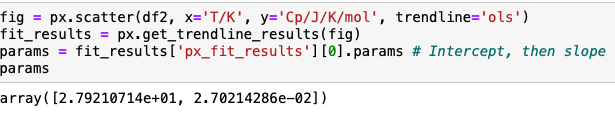

### Integrating the heat capacity to determine $\Delta H$

For this part (see last problem on assignment), you can use sympy again (you could also do this integral by hand (there's only two terms!).

In [95]:
import sympy as sm
sm.init_printing()

T = sm.symbols('T', positive=True) # Define the symbol for temperature, our independent variable